In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Método Runge-Kutta

$\frac{du}{dt} = f(t, u)$

In [24]:
def u(f, tn, un, h = 0.1):
    k1 = f(tn, un)
    k2 = f(tn + h/2, un + (h/2)*k1)
    k3 = f(tn + h/2, un + (h/2)*k2)
    k4 = f(tn + h, un + h*k3)
    return un + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def evaluate_numeric(f, u0, h = 0.1, start = 0, finish = 2):
    t = np.arange(start, finish + h, h)
    ux = [u0]
    for i in range(1, len(t)):
        ux.append(u(f, t[i],ux[i-1], h))
    return np.vstack((np.transpose(t), np.transpose(ux)))


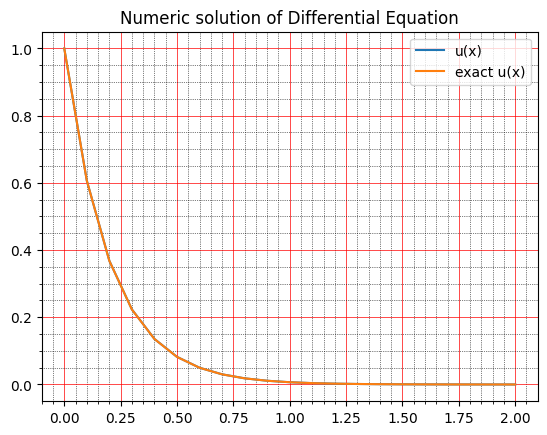

In [27]:
def dfdt(t, u):
    return -5*u

res = evaluate_numeric(dfdt, 1)

t_n = res[0]
u_n = res[1]
exact_u = np.exp(-5* t_n)
erro = np.abs(u_n - exact_u)/exact_u

fig, ax = plt.subplots()

plt.plot(t_n, u_n, label="u(x)")
plt.plot(t_n, exact_u, label="exact u(x)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

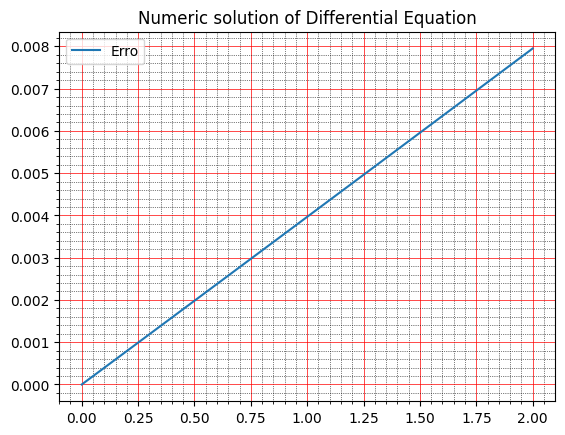

In [29]:
fig, ax = plt.subplots()

plt.plot(t_n, erro, label="Erro")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

In [57]:
def dfdt2(t, u):
    u1 = u[0]
    u2 = u[1]
    return np.array([1.2 * u1 - 0.6*u1*u2, 0.8*u2 + 0.3*u1*u2])

res2 = evaluate_numeric(dfdt2, np.array([2,1]), h = 0.001, finish = 20)

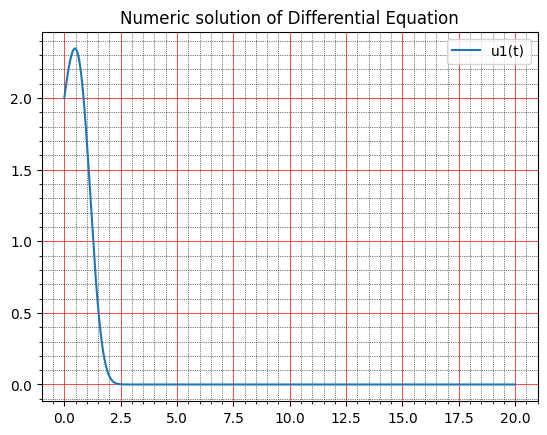

In [60]:
fig, ax = plt.subplots()

t_n = res2[0]
u0 = res2[1]
u1 = res2[2]

plt.plot(t_n, u0, label="u1(t)")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()
